In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('transactions.csv')

In [3]:
def columnNames():
    return list(df.columns)
print(columnNames())

def First_k_Rows(k):
    return df.head(k)
print(First_k_Rows(5))

def randomSample(k):
    return df.sample(n=k)
print(randomSample(5))

def unique_transaction_types():
    return df['type'].unique().tolist()
print(unique_transaction_types())

def top_10_destinations():
    return df['nameDest'].value_counts().head(10)
print(top_10_destinations())

def get_fraud_detected_rows():
    return df[df['isFraud'] == 1]
print(get_fraud_detected_rows())

def distinct_destinations_per_source():
    result = df.groupby('nameOrig')['nameDest'].nunique().reset_index()
    result.columns = ['nameOrig', 'distinct_destinations']
    return result.sort_values(by='distinct_destinations', ascending=False)
print(distinct_destinations_per_source())


['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0

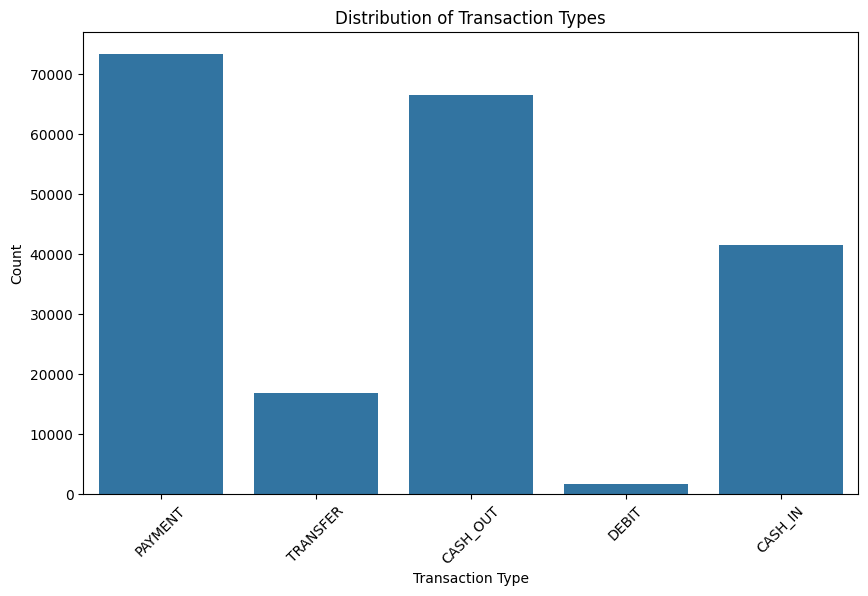

This bar chart shows the distribution of different transaction types, highlighting which transaction types are most common in the dataset.


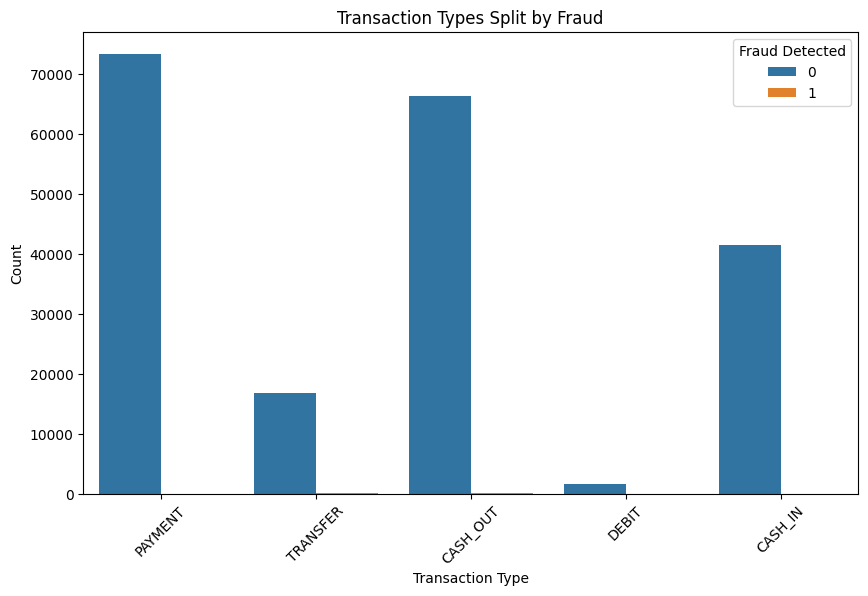

This chart splits transaction types by whether fraud was detected, helping identify if certain transaction types are more susceptible to fraud.


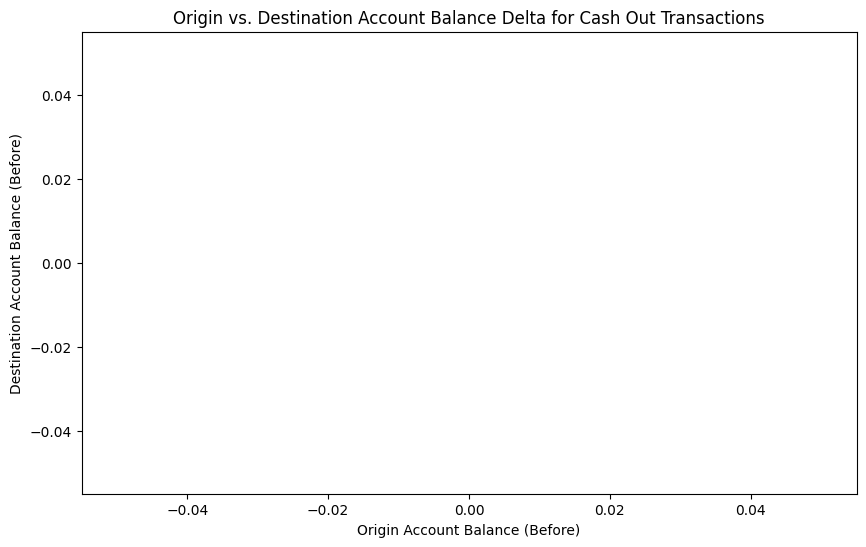

This scatter plot shows the relationship between the origin and destination account balances before the Cash Out transactions. It can help detect anomalies or irregular patterns.


In [4]:
def plot_transaction_types():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='type', data=df)
    plt.title('Distribution of Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    return "This bar chart shows the distribution of different transaction types, highlighting which transaction types are most common in the dataset."
print(plot_transaction_types())

def plot_transaction_types_by_fraud():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='type', hue='isFraud', data=df)
    plt.title('Transaction Types Split by Fraud')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Fraud Detected', loc='upper right')
    plt.show()   
    return "This chart splits transaction types by whether fraud was detected, helping identify if certain transaction types are more susceptible to fraud."
print(plot_transaction_types_by_fraud())

def plot_cash_out_balance_delta():
    cash_out_df = df[df['type'] == 'CASH-OUT']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='oldbalanceOrg', y='oldbalanceDest', data=cash_out_df)
    plt.title('Origin vs. Destination Account Balance Delta for Cash Out Transactions')
    plt.xlabel('Origin Account Balance (Before)')
    plt.ylabel('Destination Account Balance (Before)')
    plt.show()

    return "This scatter plot shows the relationship between the origin and destination account balances before the Cash Out transactions. It can help detect anomalies or irregular patterns."
print(plot_cash_out_balance_delta())
